In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [4]:
df =  pd.read_csv(r"C:\Users\sandi\Downloads\NewspaperData (1).csv")
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [5]:
df = df[['daily','sunday']]

In [8]:
df

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [7]:
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

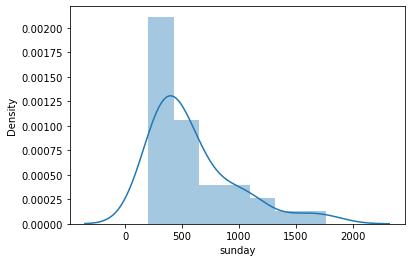

In [14]:
sns.distplot(df['sunday'])

<AxesSubplot:xlabel='daily', ylabel='Density'>

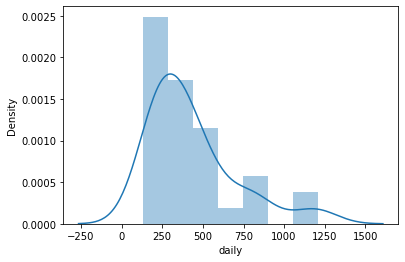

In [22]:
sns.distplot(df['daily'])

In [16]:
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<AxesSubplot:>

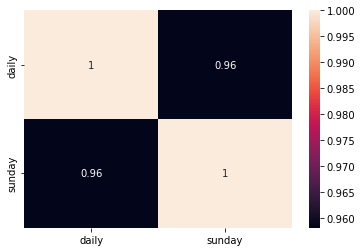

In [19]:
sns.heatmap(df.corr(),annot=True)

In [21]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='daily', ylabel='sunday'>

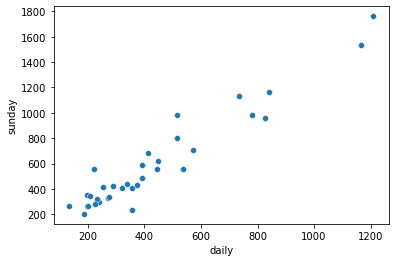

In [23]:
sns.scatterplot(df['daily'],df['sunday'])

In [24]:
import statsmodels.formula.api as smf 

In [25]:
model = smf.ols('sunday~daily',data=df).fit()

In [26]:
model

<AxesSubplot:xlabel='sunday', ylabel='daily'>

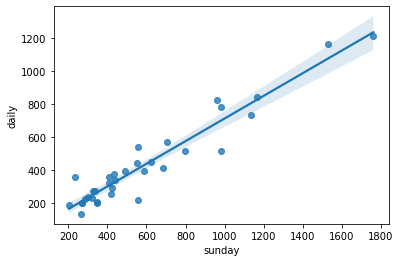

In [27]:
sns.regplot(df['sunday'],df['daily'])

In [28]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [30]:
# y = mx + c for 300 value 
1.339715*300 + 13.835630

415.75012999999996

In [33]:
print(model.tvalues,model.pvalues)

Intercept     0.386427
daily        18.934840
dtype: float64 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [34]:
print(model.rsquared,model.rsquared_adj)

0.9180596895873295 0.9154990548869336


In [45]:
newdata = pd.Series([200,600,800])

In [46]:
newdata = pd.DataFrame(newdata,columns=['daily'])

In [47]:
newdata

,daily
0,200
1,600
2,800


In [58]:
model.predict(newdata)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'daily' is not defined
    sunday~daily
           ^^^^^

0     281.778581
1     817.664485
2    1085.607436
dtype: float64